# <font color =red> Seminar 5 </font> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

## Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing
aggregations like sum() , mean() , median() , min() , and max() , in which a single num‐
ber gives insight into the nature of a potentially large dataset. In this section, we’ll from simple operations akin to what we’ve seen on
NumPy arrays, to more sophisticated operations based on the concept of a groupby .

### <font color ='blue'> Planets Data </font>
Here we will use the Planets dataset, available via the Seaborn package (see “Visualization with Seaborn” on page 311). It gives information on planets that astronomers
have discovered around other stars (known as extrasolar planets or exoplanets for
short). It can be downloaded with a simple Seaborn command:

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planets['mass'].mean()

2.6381605847953233

In [ ]:
planets['mass'].sum()

1353.37638

In [ ]:
planets[['orbital_period', 'distance']].sum(axis = 'columns')

0       346.700000
1       931.724000
2       782.840000
3       436.650000
4       635.690000
           ...    
1030    175.941507
1031    150.615864
1032    177.191524
1033    297.125083
1034    264.187757
Length: 1035, dtype: float64

There
is a convenience method describe() that computes several common aggregates for
each column and returns the result. Let’s use this on the Planets data, for now drop‐
ping rows with missing values:

In [ ]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy

Simple aggregations can give you a flavor of your dataset, but often we would prefer
to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation.
The name “group by” comes from a command in the SQL
database language, but it is perhaps more illuminative to think of it in the terms first
coined by Hadley Wickham of Rstats fame: split, apply, combine.
## Split, apply, combine
A canonical example of this split-apply-combine operation, where the “apply” is a
summation aggregation, is illustrated in Figure 3-1.
Figure 3-1 makes clear what the GroupBy accomplishes:
* The split step involves breaking up and grouping a DataFrame depending 
on the
value of the specified key.
* The apply step involves computing some function, usually an aggregate, transfor‐
mation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

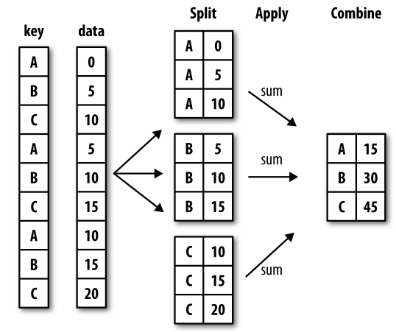

In [ ]:
Image('https://i.stack.imgur.com/sgCn1.jpg')

### Example of GroupBy

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])

In [ ]:
df.head(6)

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
df.groupby('key')

To produce a result, we can apply an aggregate to this DataFrameGroupBy object,
which will perform the appropriate apply/combine steps to produce the desired
result:

In [ ]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


Column indexing. The GroupBy object supports column indexing in the same way as
the DataFrame , and returns a modified GroupBy object. For example:

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

In [ ]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Pivoting table 

In [ ]:
df_cons = {'names':['Ruslan', 'Ivan', 'Aibek', 'Asel', 'Wang', 'Wu'], 
            'origin':['Russia', 'Russia', 'Kyrgyzstan', 'Kyrgyzstan', 'China', 'China'],
            'gender':['f', 'm', 'm', 'f', 'm', 'f'],
            'protein': [120, 115, 130, 110, 120, 115],
           'daily calories': [2400,2300, 2350 ,2000 ,2100, 2550]}

In [ ]:
df_cons = pd.DataFrame(df_cons)

In [ ]:
df_cons.head()

,names,origin,sex,protein,daily calories
0,Ruslan,Russia,f,120,2400
1,Ivan,Russia,m,115,2300
2,Aibek,Kyrgyzstan,m,130,2350
3,Asel,Kyrgyzstan,f,110,2000
4,Wang,China,m,120,2100


In [ ]:
df_cons.pivot(index = 'origin', columns = 'sex', values = ['protein', 'daily calories'])

protein      daily calories      
sex              f    m              f     m
origin                                      
China          115  120           2550  2100
Kyrgyzstan     110  130           2000  2350
Russia         120  115           2400  2300

In [ ]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)

In [ ]:
gapminder.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


In [ ]:
df = gapminder[['lifeExp','country']]
pd.pivot_table(df, values='lifeExp', columns='country', aggfunc = 'mean')

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,Benin,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo Dem. Rep.,Congo Rep.,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Czech Republic,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,...,Poland,Portugal,Puerto Rico,Reunion,Romania,Rwanda,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovak Republic,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,Yemen Rep.,Zambia,Zimbabwe
lifeExp,37.478833,68.432917,59.030167,37.8835,69.060417,74.662917,73.10325,65.605667,49.834083,73.64175,48.779917,52.504583,67.707833,54.5975,62.2395,69.74375,44.694,44.817333,47.90275,48.1285,74.90275,43.866917,46.773583,67.430917,61.78514,63.89775,52.38175,44.54375,52.501917,70.181417,48.436167,70.055917,71.045083,71.5105,74.370167,46.38075,61.5545,62.816833,56.243,59.633333,...,70.176917,70.419833,72.739333,66.64425,68.290667,41.481583,57.896333,58.67875,50.625917,68.551,36.769167,71.22025,70.696083,71.60075,40.988667,53.993167,74.203417,66.526083,48.4005,49.002417,76.177,75.565083,61.346167,70.336667,47.912333,62.20025,51.49875,66.828,60.721,59.696417,47.618833,73.922583,73.4785,70.781583,66.580667,57.4795,60.328667,46.780417,45.996333,52.663167


In [ ]:
df1 = gapminder[['lifeExp', 'year', 'continent']]
pd.pivot_table(df1, index ='year',values = 'lifeExp', columns = 'continent')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.2550
1957,41.266346,55.96028,49.318544,66.703067,70.2950
1962,43.319442,58.39876,51.563223,68.539233,71.0850
1967,45.334538,60.41092,54.663640,69.737600,71.3100
1972,47.450942,62.39492,57.319269,70.775033,71.9100
1977,49.580423,64.39156,59.610556,71.937767,72.8550
1982,51.592865,66.22884,62.617939,72.806400,74.2900
1987,53.344788,68.09072,64.851182,73.642167,75.3200
1992,53.629577,69.56836,66.537212,74.440100,76.9450


In [ ]:
df1 = gapminder[['lifeExp', 'year', 'continent']]
pd.pivot_table(df1, index ='year',values = 'lifeExp', columns = 'continent', aggfunc =[min, max])

min                           ...      max                        
continent  Africa Americas    Asia  Europe  ... Americas    Asia  Europe Oceania
year                                        ...                                 
1952       30.000   37.579  28.801  43.585  ...   68.750  65.390  72.670  69.390
1957       31.570   40.696  30.332  48.079  ...   69.960  67.840  73.470  70.330
1962       32.767   43.428  31.997  52.098  ...   71.300  69.390  73.680  71.240
1967       34.113   45.032  34.020  54.336  ...   72.130  71.430  74.160  71.520
1972       35.400   46.714  36.088  57.005  ...   72.880  73.420  74.720  71.930
1977       36.788   49.923  31.220  59.507  ...   74.210  75.380  76.110  73.490
1982       38.445   51.461  39.854  61.036  ...   75.760  77.110  76.990  74.740
1987       39.906   53.636  40.822  63.108  ...   76.860  78.670  77.410  76.320
1992       23.599   55.089  41.674  66.146  ...   77.950  79.360  78.770  77.560
1997       36.087   56.671  41.763  68.835  ...   78.610  80.690  79.390  78.830
2002       39.193   58.137  42.129  70.845  ...   79.770  82.000  80.620  80.370
2007       39.613   60.916  43.828  71.777  ...   80.653  82.603  81.757  81.235

[12 rows x 10 columns]

## <font color = "blue"> Titanic Data Set </font>

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
pd.pivot_table(titanic, 'survived', index ='sex')

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
pd.pivot_table(titanic, 'survived', index = 'sex', columns = 'class' )

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Multilevel pivot tables

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 50, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

In [ ]:
titanic.pivot_table(index='sex', columns='class',
aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name = 'Survival rate')

class,First,Second,Third,Survival rate
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Survival rate,0.629630,0.472826,0.242363,0.383838


## Examples of exploratory data analysis


### <font color ="blue"> MovieLens 1M Dataset </font>

GroupLens Research provides a number of collections of movie ratings data collected
from users of MovieLens in the late 1990s and early 2000s. The data provide movie
ratings, movie metadata (genres and year), and demographic data about the users
(age, zip code, gender identification, and occupation). Such data is often of interest in
the development of recommendation systems based on machine learning algorithms.
While we do not explore machine learning techniques in detail in this book, I will
show you how to slice and dice datasets like these into the exact form you need.
The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on
4,000 movies. It’s spread across three tables: ratings, user information, and movie
information. After extracting the data from the ZIP file, we can load each table into a
pandas DataFrame object using pandas.read_table :

**Loading data**

In [ ]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

users = pd.read_table('https://raw.githubusercontent.com/IliasSuvanov/DSforEconomists/master/Seminar4-5/ml-1m/users.dat', sep='::',
header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

ratings = pd.read_csv('https://raw.githubusercontent.com/IliasSuvanov/DSforEconomists/master/Seminar4-5/ml-1m/ratings.dat', sep='::',
header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']

movies = pd.read_table('https://raw.githubusercontent.com/IliasSuvanov/DSforEconomists/master/Seminar4-5/ml-1m/movies.dat', sep='::',
header=None, names=mnames, encoding = 'iso-8859-1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Merging tables

In [ ]:
Image(url = "https://cdn.extendoffice.com/images/stories/doc-excel/merge-tables-by-a-column/doc-merge-tables-by-a-column-1.png")

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)

In [ ]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


To get mean movie ratings for each film grouped by gender, we can use the
pivot_table method:

In [ ]:
mean_ratings = data.pivot_table('rating', index='title',
columns='gender', aggfunc='mean')

In [ ]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [ ]:
ratings_by_title = data.groupby('title').size()

In [ ]:
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [ ]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]

To see top female movies by rating, we can sort our Series

In [ ]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [ ]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [ ]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [ ]:
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [ ]:
sorted_by_diff.tail()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [ ]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [ ]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [ ]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### <font color = blue> US Baby Names 1880–2019 </font>
The United States Social Security Administration (SSA) has made available data on
the frequency of baby names from 1880 through the present. Hadley Wickham, an
author of several popular R packages, has often made use of this dataset in illustrating
data manipulation in R.
We need to do some data wrangling to load this dataset, but once we do that we will
have a DataFrame that looks like this:

In [ ]:
years = range(1880, 1890)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
  path = 'https://raw.githubusercontent.com/IliasSuvanov/DSforEconomists/master/Seminar4-5/names/yob{}.txt'.format(year)
  frame = pd.read_csv(path, names=columns)
  frame['year'] = year
  pieces.append(frame)

In [ ]:
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],            name sex  births  year
 0          Mary   F    8148  1882
 1          Anna   F    3143  1882
 

In [ ]:
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names.head(20)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [ ]:
total_births = names.pivot_table('births', index='year',
columns='sex', aggfunc=sum)

In [ ]:
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110784
1887,145982,101412
1888,178622,120851


In [ ]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


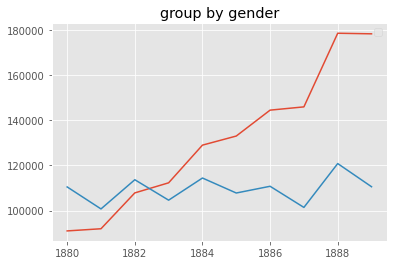

In [ ]:
plt.plot(total_births)
plt.title("group by gender")
plt.style.use("ggplot")
plt.grid(True)
plt.legend()

## <font color = "blue"> Birthrate Data </font>
As a more interesting example, let’s take a look at the freely available data on births in
the United States, provided by the Centers for Disease Control (CDC). This data can
be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 


In [ ]:
# shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   847k      0 --:--:-- --:--:-- --:--:--  844k


In [ ]:
!ls

births.csv  sample_data


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births['decade'] = 10 * (births['year'] // 10)

In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [ ]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


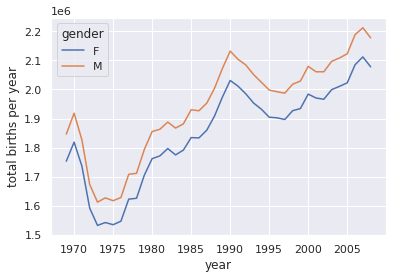

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');